In [1]:
import pandas as pd
# Librerías usadas para estandarizar la información
import repositories.dicts as dicts
import repositories.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

,geometry,NOMBRE_MPI,codmunre
0,"POLYGON ((1290154.980 1796649.425, 1270385.550...",URIBIA,44847
1,"POLYGON ((1187687.339 1800431.820, 1188158.788...",MANAURE,44560
2,"POLYGON ((1198031.055 1767210.476, 1212713.613...",MAICAO,44430
3,"POLYGON ((1156062.702 1755981.216, 1159630.667...",RIOHACHA,44001
4,"POLYGON ((1095571.713 1750924.096, 1097255.333...",DIBULLA,44090
...,...,...,...
1117,"POLYGON ((704986.838 1318357.371, 716584.555 1...",MUTATA,5480
1118,"POLYGON ((689343.717 1293927.217, 689505.362 1...",CARMEN DEL DARIEN,27150
1119,"POLYGON ((168440.793 1896450.410, 168454.340 1...",SAN ANDRES,88001
1120,"POLYGON ((208230.889 1983876.766, 208230.084 1...",SANTA CATALINA,88000


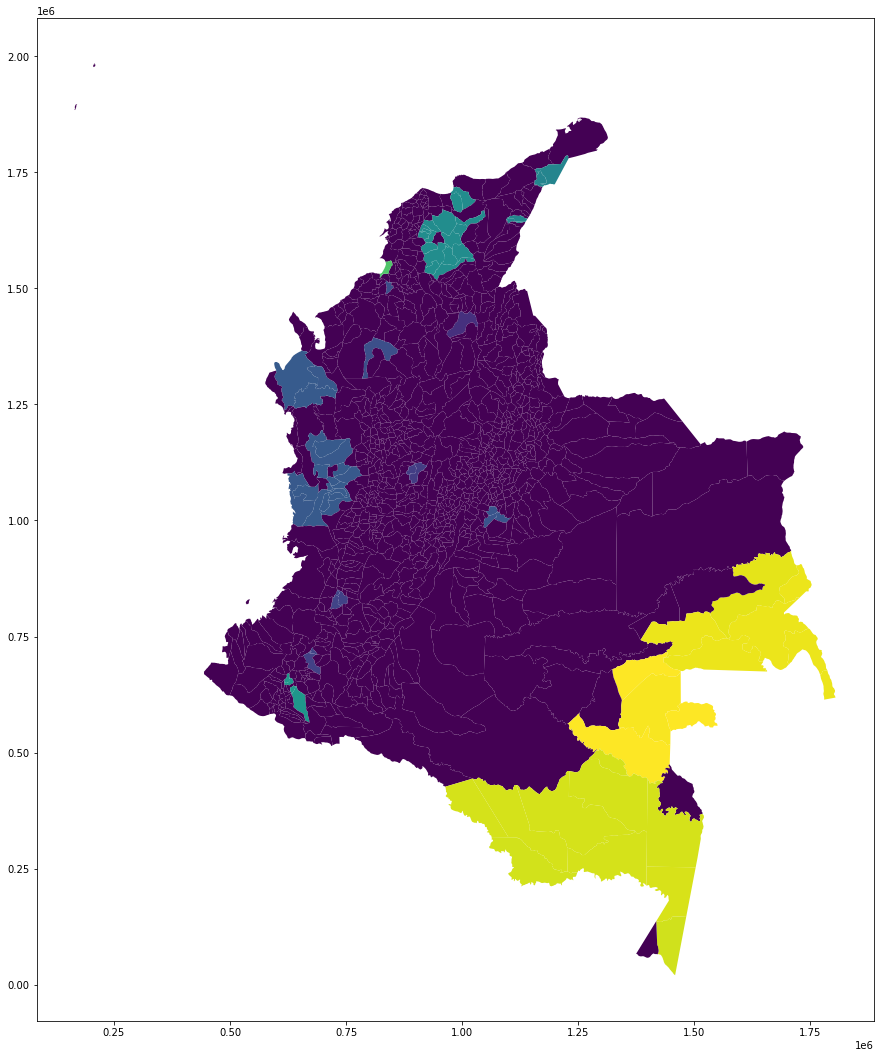

In [2]:
import geopandas as gpd

new_set=set(dicts.municipios_segregantes_unique.keys()).union(set(dicts.municipios_segregantes_unique.values()))

colombia=gpd.read_file("data/mpio/mpio.shp")
colombia["codmunre"]=colombia.apply(lambda x:int(x.MPIOS),axis=1)
colombia["change"]=colombia.codmunre.isin(new_set)*colombia.codmunre
fig,ax=plt.subplots(figsize=(15,20))
colombia.plot(column="change",ax=ax)
colombia=colombia[["geometry","NOMBRE_MPI","codmunre"]]
colombia

In [3]:
df_hernan=pd.DataFrame(pd.read_csv("data/BD_MUNICIPIOS_RED_VAR.csv"))
#df_hernan=df_hernan[1:1122]
#df_hernan.DPMP=df_hernan.DPMP.apply(lambda x: str(int(x)).zfill(5))
df_hernan

,DP,DPNOM,DPMP,MPIO,CATEGORIA MUNICIPIO,DV 2005 TOTAL,DV 2005 CUANTITATIVO,DV 2005 CUALITATIVO,TOTAL NBI 2005,TOTAL NBI 2018,...,"% COBERTURA 2005 (Afiliados2005/Pob. SISBEN 1, 2 y 3 menos poblaciOn Sisben 1, 2 y 3 afiliada al REgimen Contributivo)","% COBERTURA 2006 (Afiliados2006/Pob. SISBEN 1, 2 y 3 mas poblacion indigena menos poblacion Sisben 1, 2 y 3 afiliada al Régimen Contributivo menos poblacion d0laza en el RS)",% COBERTURA 2007 (Afiliados2007/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ),% COBERTURA 2008 (Afiliados2008/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ),% COBERTURA 2009 (Afiliados2009/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Noviembre de 2009,% COBERTURA 2009 (Afiliados2009/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Abril 2010 de los Contrato a Diciembre de 2009,% COBERTURA 2010 (Afiliados2010/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Marzo 31 de 2010,% COBERTURA 2011 (Afiliados2011/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ) Diciembre 31 de 2011,% COBERTURA 2012 (Afiliados 2012/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ) Diciembre 31 de 2012,MEDIANA
0,5,Antioquia,5002,Abejorral,6,5064.0,98.00,2321.00,33.851120,8.757755,...,0.689790,0.718396,0.753006,0.890546,0.905819,0.874972,0.874972,1.0,1.0,0.739609755
1,5,Antioquia,5004,Abriaquí,6,579.0,11.00,307.00,28.538283,4.802260,...,1.296357,0.995106,1.000000,1.000000,1.000000,0.961582,0.961582,1.0,1.0,1.103703254
2,5,Antioquia,5021,Alejandría,6,1045.0,16.00,485.00,33.136095,6.948229,...,0.905886,0.871604,0.940034,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.888745149
3,5,Antioquia,5030,Amagá,6,6928.0,197.88,982.22,27.069045,7.829649,...,0.404318,0.432325,0.595622,0.845960,0.896134,0.897134,0.897134,1.0,1.0,0.714523249
4,5,Antioquia,5031,Amalfi,6,4991.0,251.04,2150.22,45.285489,11.646967,...,0.789471,0.810339,0.914921,0.937932,0.956681,1.000000,1.000000,1.0,1.0,0.79990489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,97,Vaupés,97889,Yavaraté (CD),NaN,206.0,46.00,158.00,78.517902,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,99,Vichada,99773,Cumaribo,#VALUE!,4967.0,1866.00,2627.00,82.430179,32.474227,...,1.021854,1.000000,0.923047,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.961523322
1119,99,Vichada,99524,La Primavera,6,NaN,NaN,NaN,100.000000,37.574937,...,0.790635,0.798959,0.742112,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.766373409
1120,99,Vichada,99001,Puerto Carreño,6,2804.0,577.35,2056.42,45.619405,31.977044,...,0.829751,0.838912,0.864610,0.817225,0.799983,1.000000,1.000000,1.0,1.0,0.812502675


In [4]:
datos=colombia.merge(df_hernan,how="left",left_on="codmunre",right_on="DPMP")
datos=datos[~datos["DPMP"].isna()].copy()
datos["DPMP"]=datos["DPMP"].astype(int)

In [5]:
datos["DPMP"]=datos["DPMP"].apply(lambda x: dicts.municipios_segregantes_unique[int(x)] if (int(x) in dicts.municipios_segregantes_unique.keys()) else x)
datos["codmunre"]=datos["codmunre"].apply(lambda x: dicts.municipios_segregantes_unique[int(x)] if (int(x) in dicts.municipios_segregantes_unique.keys()) else x)


In [6]:
datos_after_group=datos.dissolve(by="codmunre",aggfunc='median')

In [7]:
datos_after_group

,geometry,DP,DPMP,DV 2005 TOTAL,DV 2005 CUANTITATIVO,DV 2005 CUALITATIVO,TOTAL NBI 2005,TOTAL NBI 2018,MEDIA,ÍNDICE DE POBREZA MULTIDIMENSIONAL MUNICIPAL,...,Cob. 2004/NBI,"% COBERTURA 2005 (Afiliados2005/Pob. SISBEN 1, 2 y 3 menos poblaciOn Sisben 1, 2 y 3 afiliada al REgimen Contributivo)","% COBERTURA 2006 (Afiliados2006/Pob. SISBEN 1, 2 y 3 mas poblacion indigena menos poblacion Sisben 1, 2 y 3 afiliada al Régimen Contributivo menos poblacion d0laza en el RS)",% COBERTURA 2007 (Afiliados2007/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ),% COBERTURA 2008 (Afiliados2008/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ),% COBERTURA 2009 (Afiliados2009/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Noviembre de 2009,% COBERTURA 2009 (Afiliados2009/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Abril 2010 de los Contrato a Diciembre de 2009,% COBERTURA 2010 (Afiliados2010/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1y 2 afiliada al Régimen Contributivo ) Marzo 31 de 2010,% COBERTURA 2011 (Afiliados2011/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ) Diciembre 31 de 2011,% COBERTURA 2012 (Afiliados 2012/Pob. SISBEN 1 y 2 mas poblacion indigena menos poblacion Sisben 1 y 2 afiliada al Régimen Contributivo ) Diciembre 31 de 2012
codmunre,,,,,,,,,,,,,,,,,,,,,
5001,"POLYGON ((823566.016 1197353.633, 823563.861 1...",5.0,5001.0,605192.0,40721.64,44003.41,12.424090,5.173499,8.798794,0.323973,...,1.401881,1.056168,1.000000,1.000000,1.000000,0.982190,1.000000,1.000000,0.884122,1.0
5002,"POLYGON ((843942.609 1147248.866, 845348.945 1...",5.0,5002.0,5064.0,98.00,2321.00,33.851120,8.757755,21.304437,0.664969,...,0.798867,0.689790,0.718396,0.753006,0.890546,0.905819,0.874972,0.874972,1.000000,1.0
5004,"POLYGON ((785250.893 1227759.930, 784488.705 1...",5.0,5004.0,579.0,11.00,307.00,28.538283,4.802260,16.670271,0.525290,...,1.207407,1.296357,0.995106,1.000000,1.000000,1.000000,0.961582,0.961582,1.000000,1.0
5021,"POLYGON ((880984.419 1198952.524, 883031.641 1...",5.0,5021.0,1045.0,16.00,485.00,33.136095,6.948229,20.042162,0.600861,...,0.817017,0.905886,0.871604,0.940034,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
5030,"POLYGON ((814867.676 1162785.341, 815124.567 1...",5.0,5030.0,6928.0,197.88,982.22,27.069045,7.829649,17.449347,0.465556,...,0.790864,0.404318,0.432325,0.595622,0.845960,0.896134,0.897134,0.897134,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97666,"POLYGON ((1446985.833 474586.755, 1446977.271 ...",97.0,97666.0,226.0,86.00,89.00,82.068966,44.726562,63.397764,0.899507,...,0.616071,0.900391,0.986486,0.936821,1.000000,0.987643,0.974672,0.974672,1.000000,1.0
99001,"POLYGON ((1612523.232 1169850.979, 1616471.348...",99.0,99001.0,2804.0,577.35,2056.42,45.619405,31.977044,38.798225,0.680732,...,0.764556,0.829751,0.838912,0.864610,0.817225,0.799983,1.000000,1.000000,1.000000,1.0
99524,"POLYGON ((1612523.232 1169850.979, 1614894.727...",99.0,99524.0,NaN,NaN,NaN,100.000000,37.574937,68.787469,0.909675,...,0.487216,0.790635,0.798959,0.742112,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# Reading TAE DATA

In [8]:
df_TAE=pd.read_excel("output_files/TAE_&_mortality.xlsx")
df_TAE

,Unnamed: 0,DPMP,mort_1998,mort_1999,mort_2000,mort_2001,mort_2002,mort_2003,mort_2004,mort_2005,...,TAE_2010,TAE_2011,TAE_2012,TAE_2013,TAE_2014,TAE_2015,TAE_2016,TAE_2017,TAE_2018,MPIO
0,0,5001,117,140,152,121,156,181,166,138,...,15.113675,15.304540,15.472662,15.775365,15.975835,14.570198,16.403328,16.935918,14.176541,Medellín
1,1,5002,0,0,1,0,0,0,1,2,...,8.551724,0.000000,0.000000,18.048366,7.322835,9.263804,28.786943,7.106109,0.000000,Abejorral
2,2,5004,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,139.085297,69.062500,0.000000,82.222222,0.000000,Abriaquí
3,3,5021,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Alejandría
4,4,5030,0,1,2,0,0,1,0,1,...,19.424761,24.301651,5.994730,6.757991,13.481400,5.118110,18.817483,17.079392,4.846570,Amagá
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1059,97666,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Taraira
1060,1060,99001,0,2,1,0,0,0,1,1,...,41.081081,0.000000,0.000000,0.000000,0.000000,0.000000,14.583333,16.723164,0.000000,Puerto carreño
1061,1061,99524,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,La primavera
1062,1062,99624,0,0,0,0,0,0,0,0,...,0.000000,70.860215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Santa rosalía


In [9]:
df_pob=pd.read_csv("pob_recodificada.csv")
df_pob

,Unnamed: 0,DPMP,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,5001,991843,1008226,1024009,1039108,1053805,1068062,1081808,1094475,...,1150885,1164975,1178109,1190417,1202762,1216048,1229987,1246042,1263834,1286471
1,1,5002,12232,12118,12013,11927,11790,11674,11563,11412,...,10967,10833,10667,10416,10223,10096,9980,9904,9865,9833
2,2,5004,1276,1276,1317,1302,1322,1305,1330,1327,...,1287,1279,1275,1258,1248,1222,1208,1217,1231,1243
3,3,5021,2395,2433,2386,2407,2406,2397,2397,2388,...,2379,2370,2359,2336,2338,2352,2354,2300,2304,2337
4,4,5030,12953,13079,13214,13323,13421,13506,13603,13682,...,14063,14180,14328,14433,14625,14687,14819,14944,15079,15365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1059,97666,395,394,444,484,528,539,570,535,...,678,718,786,852,912,942,981,1006,1047,1066
1060,1060,99001,7657,7800,7916,8040,8154,8299,8395,8646,...,9098,9187,9300,9381,9453,9522,9595,9687,9748,9912
1061,1061,99524,3419,3484,3572,3631,3741,3841,3930,3893,...,4203,4262,4339,4394,4473,4517,4572,4616,4717,4724
1062,1062,99624,1244,1285,1270,1327,1378,1412,1472,1486,...,1660,1707,1731,1755,1782,1826,1862,1881,1926,1929


In [10]:
datos_final=datos_after_group.merge(df_TAE,how="inner",left_on="DPMP",right_on="DPMP")


In [11]:
datos_final=datos_final.merge(df_pob, how="right",left_on="DPMP",right_on="DPMP")


In [12]:
datos_final.to_excel("output_files/datos_final.xlsx")

In [13]:
datos_final.to_csv("output_files/datos_final.csv")

In [15]:
df_pob[df_pob.DPMP==23682]

,Unnamed: 0,DPMP,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018


In [16]:
datos_final[datos_final.DPMP_x==25839]

AttributeError: 'GeoDataFrame' object has no attribute 'DPMP_x'

In [17]:
import geopandas as gpd
datos_final=gpd.GeoDataFrame(datos_final)

In [27]:
np.random.rand(len(datos_final))

array([0.4822555 , 0.70689874, 0.96470611, ..., 0.51913953, 0.73112726,
       0.00440176])

<AxesSubplot:>

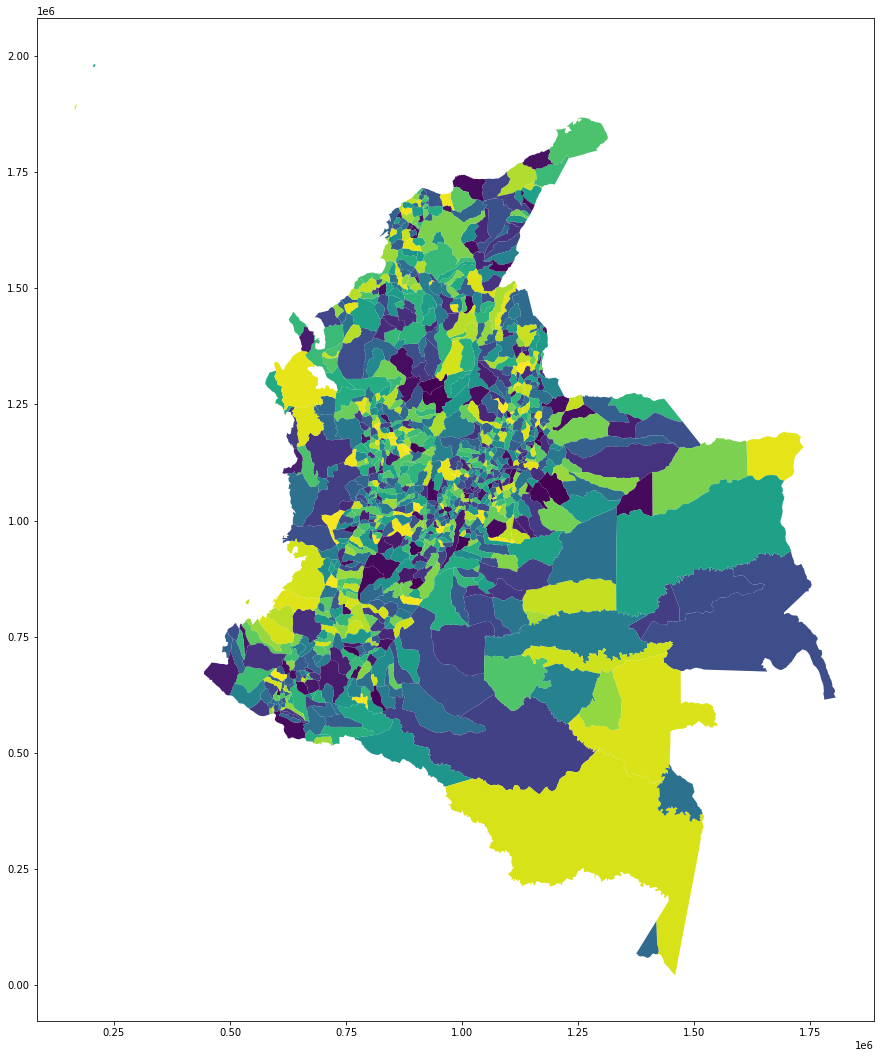

In [28]:
fig,ax=plt.subplots(figsize=(15,20))
datos_final["fila"]=np.random.rand(len(datos_final))
datos_final.plot(column="fila",ax=ax)